In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from bs4 import BeautifulSoup

In [3]:
def filter_column(df, column_name, text_to_filter, regex=False):
    before_filtering = len(df)
    df = df[
        ~df[f"{column_name}"].str.contains(f"{text_to_filter}", na=False, regex=regex)
    ]
    after_filtering = len(df)
    print(f"Deleted {before_filtering-after_filtering} rows")
    return df

In [4]:
qa = pd.read_csv(r"/home/st-gorbatovski/sollama/data/processed/all_python_qa.csv")

In [5]:
qa = qa.rename(columns={'Body': 'Question'})

In [6]:
qa_filtered = filter_column(qa, "Question", "</code></pre>")

qa_filtered = filter_column(qa_filtered, "Answer", "</code></pre>")
qa_filtered = filter_column(qa_filtered, "Answer", "<img")
qa_filtered = filter_column(qa_filtered, "Answer", "<a href=")

Deleted 48866 rows
Deleted 123364 rows
Deleted 152 rows
Deleted 18182 rows


In [7]:
qa.describe()

,Id,Score,ViewCount,AnswerCount,A_Id,A_Score
count,2.566240e+05,256624.000000,2.566240e+05,256624.000000,2.566240e+05,256624.000000
mean,3.952718e+07,25.550740,3.030591e+04,3.414314,4.276149e+07,5.275843
std,2.839023e+07,177.877686,1.971810e+05,4.225573,2.761566e+07,54.226438
min,3.370000e+02,0.000000,6.000000e+00,1.000000,3.420000e+02,-42.000000
25%,8.371887e+06,0.000000,9.800000e+01,1.000000,1.331596e+07,0.000000
50%,4.178732e+07,1.000000,5.390000e+02,2.000000,4.879839e+07,1.000000
75%,7.019893e+07,4.000000,3.754000e+03,4.000000,7.087645e+07,2.000000
max,7.664636e+07,6790.000000,6.808733e+06,64.000000,7.664698e+07,5995.000000


In [59]:
# qa_filtered.describe()

## Scores distribution

In [8]:
qa['A_Score'].describe()

count    256624.000000
mean          5.275843
std          54.226438
min         -42.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        5995.000000
Name: A_Score, dtype: float64

In [9]:
IQR = qa['A_Score'].quantile(0.75) - qa['A_Score'].quantile(0.15)
print('Lower bound')
print(qa['A_Score'].quantile(0.15) - 1.5*IQR)
print('Higher bound')
print(qa['A_Score'].quantile(0.73) + 1.5*IQR)
print("-----"*10)

print("Count under the Max Abs Scaler")
print(len(qa[(qa['A_Score'] >= -3) & (qa['A_Score'] <= 5)]))
print("Count under the lower bound")
print(len(qa[(qa['A_Score'] < -3)]))
print("Count upper the highter bound")
print(len(qa[(qa['A_Score'] > 5)]))

Lower bound
-3.0
Higher bound
5.0
--------------------------------------------------
Count under the Max Abs Scaler
226819
Count under the lower bound
376
Count upper the highter bound
29429


In [8]:
# IQR = qa_filtered['A_Score'].quantile(0.75) - qa_filtered['A_Score'].quantile(0.15)
# print('Lower bound')
# print(qa_filtered['A_Score'].quantile(0.15) - 1.5*IQR)
# print('Higher bound')
# print(qa_filtered['A_Score'].quantile(0.73) + 1.5*IQR)
# print("-----"*10)

# print("Count under the Max Abs Scaler")
# print(len(qa_filtered[(qa_filtered['A_Score'] >= -3) & (qa_filtered['A_Score'] <= 5)]))
# print("Count under the lower bound")
# print(len(qa_filtered[(qa_filtered['A_Score'] < -3)]))
# print("Count upper the highter bound")
# print(len(qa_filtered[(qa_filtered['A_Score'] > 5)]))

In [10]:
qa_bounds = qa[(qa['A_Score'] >= -3) & (qa['A_Score'] <= 5)]
# qa_filtered_bounds = qa_filtered[(qa_filtered['A_Score'] >= -3) & (qa_filtered['A_Score'] <= 5)]

In [11]:
down_bounds = qa[(qa['A_Score'] < -3)]
up_bounds = qa[(qa['A_Score'] > 5)]

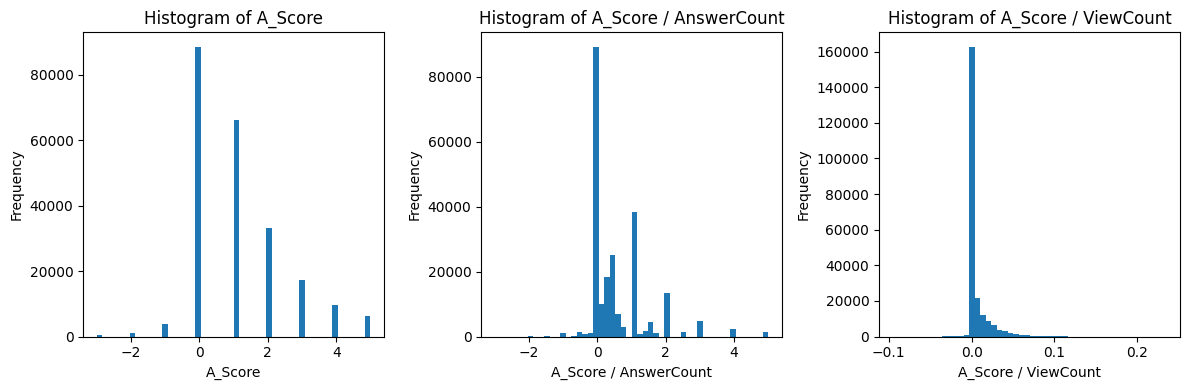

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# График 1
axes[0].hist(qa_bounds["A_Score"], bins=50)
axes[0].set_title("Histogram of A_Score")
axes[0].set_xlabel("A_Score")
axes[0].set_ylabel("Frequency")

# График 2
axes[1].hist(qa_bounds['A_Score'] / qa_bounds.AnswerCount, bins=50)
axes[1].set_title("Histogram of A_Score / AnswerCount")
axes[1].set_xlabel("A_Score / AnswerCount")
axes[1].set_ylabel("Frequency")

# График 3
axes[2].hist(qa_bounds['A_Score'] / qa_bounds.ViewCount, bins=50)
axes[2].set_title("Histogram of A_Score / ViewCount")
axes[2].set_xlabel("A_Score / ViewCount")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [64]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# # График 1
# axes[0].hist(qa_filtered_bounds["A_Score"], bins=50)
# axes[0].set_title("Histogram of A_Score")
# axes[0].set_xlabel("A_Score")
# axes[0].set_ylabel("Frequency")

# # График 2
# axes[1].hist(qa_filtered_bounds['A_Score'] / qa_filtered_bounds.AnswerCount, bins=50)
# axes[1].set_title("Histogram of A_Score / AnswerCount")
# axes[1].set_xlabel("A_Score / AnswerCount")
# axes[1].set_ylabel("Frequency")

# # График 3
# axes[2].hist(qa_filtered_bounds['A_Score'] / qa_filtered_bounds.ViewCount, bins=50)
# axes[2].set_title("Histogram of A_Score / ViewCount")
# axes[2].set_xlabel("A_Score / ViewCount")
# axes[2].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()


In [12]:
m_a_scaler = preprocessing.MaxAbsScaler()

In [13]:
a_score_scaled = m_a_scaler.fit_transform(
    qa_bounds["A_Score"].values.reshape(-1, 1)
).reshape(1, -1)[0]
a_score_scaled_dev = m_a_scaler.fit_transform(
    (qa_bounds["A_Score"] / qa_bounds.AnswerCount).values.reshape(-1, 1)
).reshape(1, -1)[0]

In [13]:
# filtered_a_score_scaled = m_a_scaler.fit_transform(
#     qa_filtered_bounds["A_Score"].values.reshape(-1, 1)
# ).reshape(1, -1)[0]
# filtered_a_score_scaled_dev = m_a_scaler.fit_transform(
#     (qa_filtered_bounds["A_Score"] / qa_filtered_bounds.AnswerCount).values.reshape(-1, 1)
# ).reshape(1, -1)[0]

In [14]:
qa_bounds['A_Score_scaled'] = a_score_scaled
qa_bounds['A_Score_scaled_dev'] = a_score_scaled_dev

qa_bounds['A_Score_scaled_tanh'] = np.tanh(a_score_scaled)
qa_bounds['A_Score_scaled_dev_tanh'] = np.tanh(a_score_scaled_dev)

/tmp/ipykernel_2988810/4061290662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_bounds['A_Score_scaled'] = a_score_scaled
/tmp/ipykernel_2988810/4061290662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_bounds['A_Score_scaled_dev'] = a_score_scaled_dev
/tmp/ipykernel_2988810/4061290662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [15]:
# qa_filtered_bounds['A_Score_scaled'] = filtered_a_score_scaled
# qa_filtered_bounds['A_Score_scaled_dev'] = filtered_a_score_scaled_dev

# qa_filtered_bounds['A_Score_scaled_tanh'] = np.tanh(filtered_a_score_scaled)
# qa_filtered_bounds['A_Score_scaled_dev_tanh'] = np.tanh(filtered_a_score_scaled_dev)

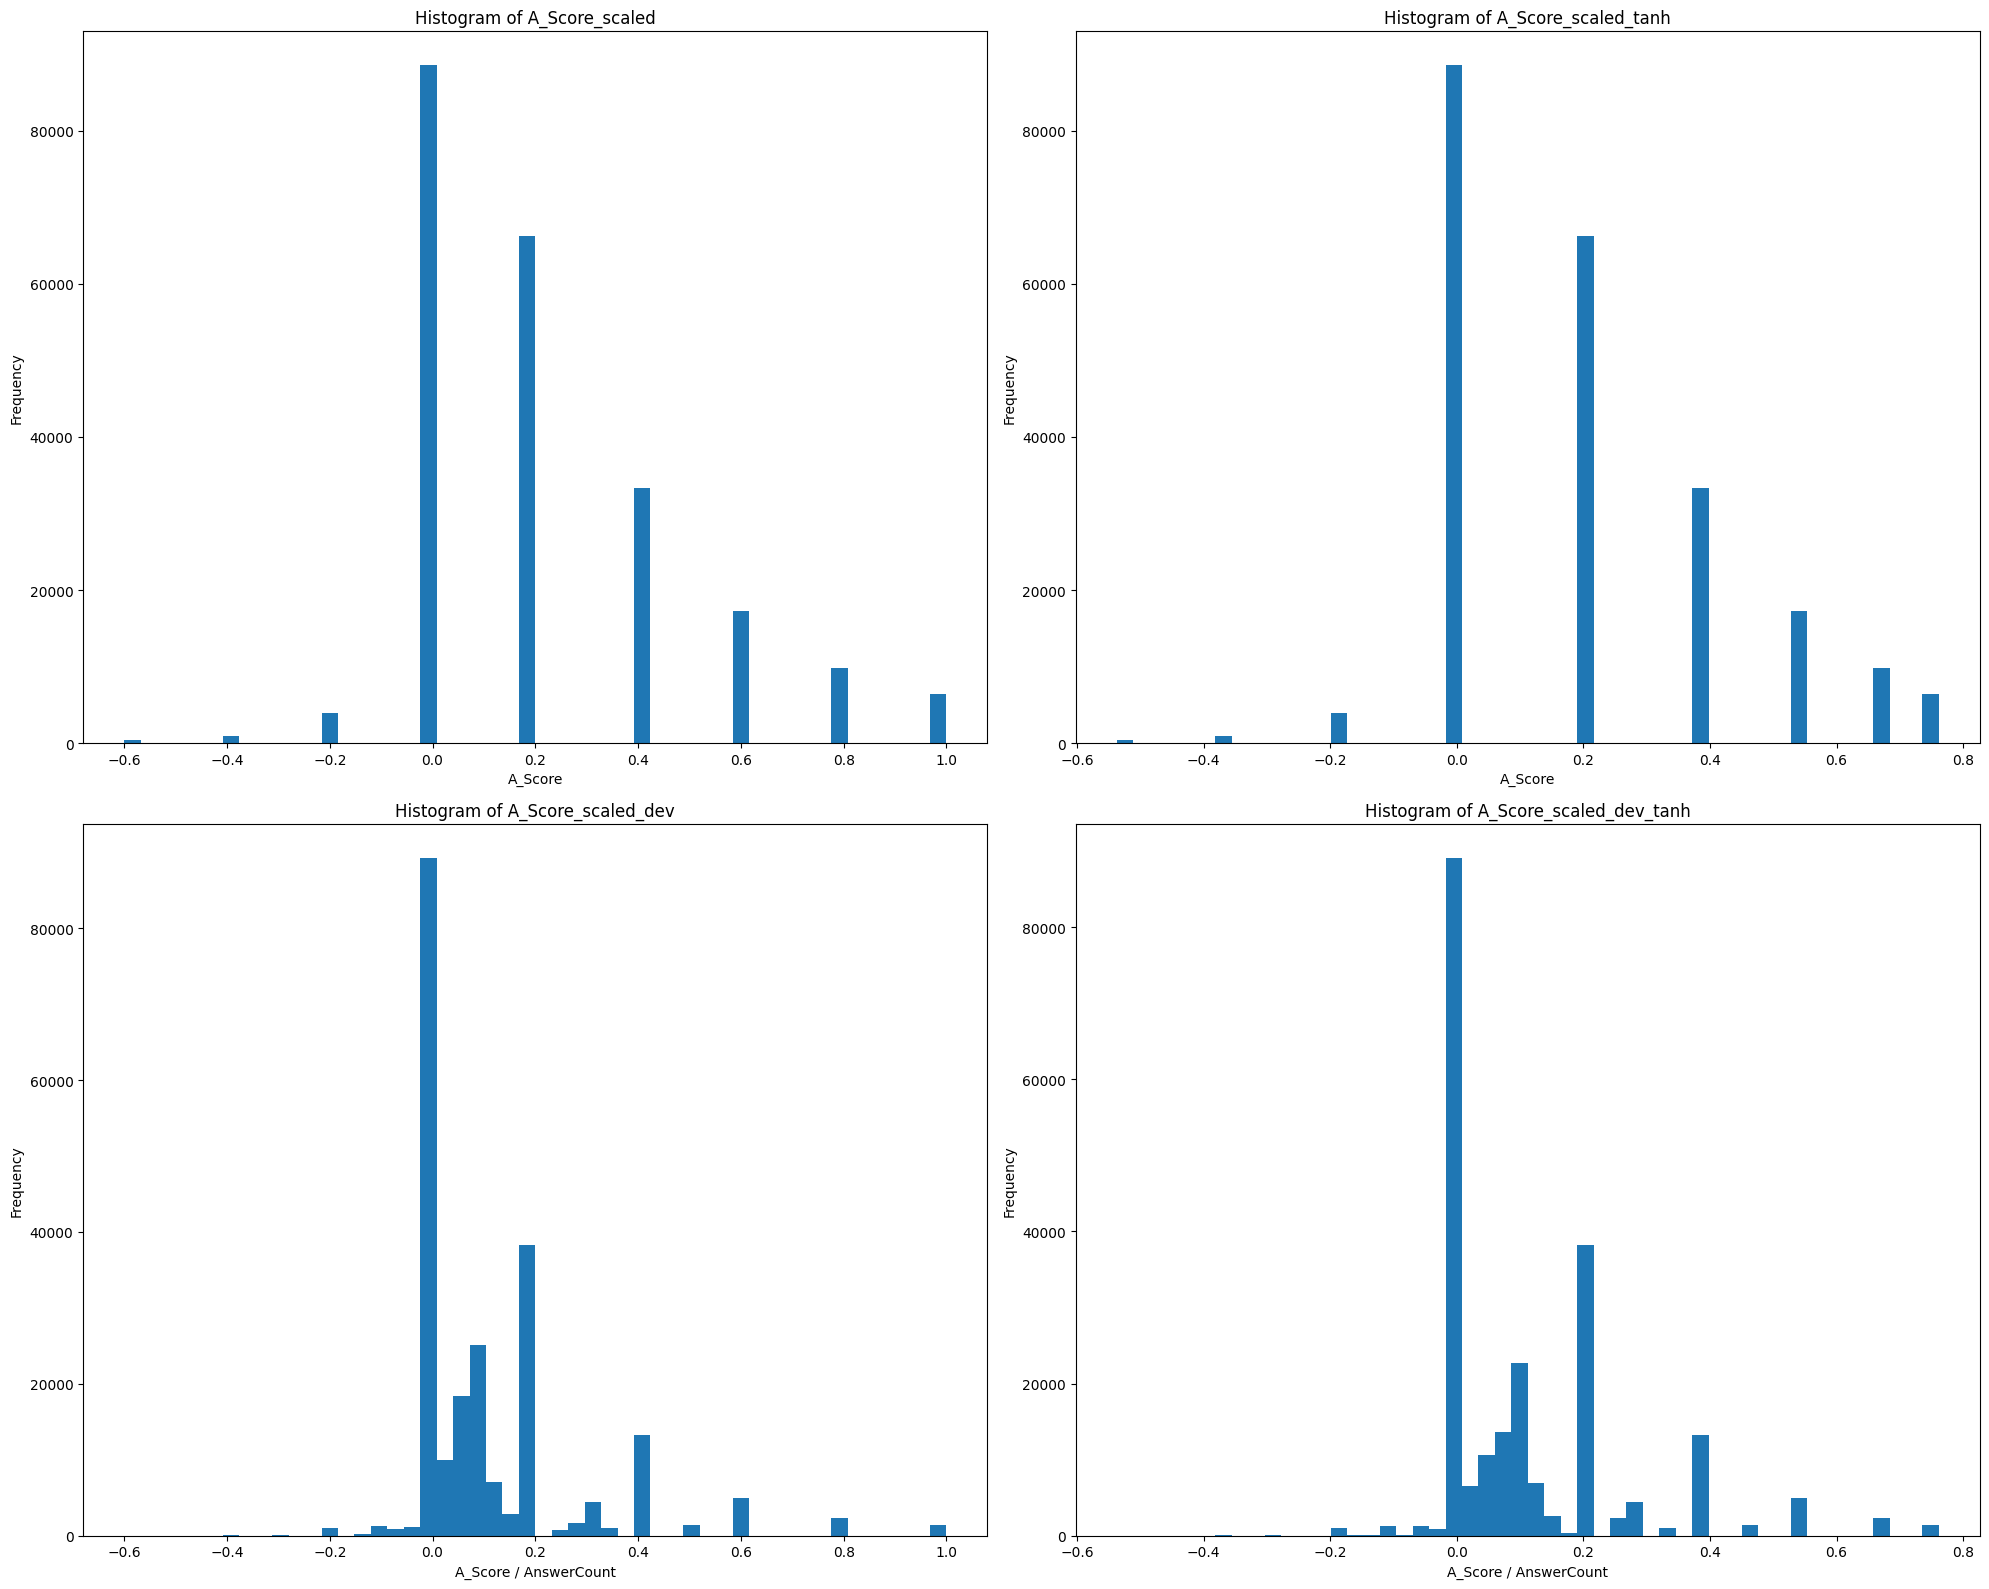

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# График 1
axes[0, 0].hist(qa_bounds['A_Score_scaled'], bins=50)
axes[0, 0].set_title("Histogram of A_Score_scaled")
axes[0, 0].set_xlabel("A_Score")
axes[0, 0].set_ylabel("Frequency")

# График 2
axes[1, 0].hist(qa_bounds['A_Score_scaled_dev'], bins=50)
axes[1, 0].set_title("Histogram of A_Score_scaled_dev")
axes[1, 0].set_xlabel("A_Score / AnswerCount")
axes[1, 0].set_ylabel("Frequency")

axes[0, 1].hist(qa_bounds['A_Score_scaled_tanh'], bins=50)
axes[0, 1].set_title("Histogram of A_Score_scaled_tanh")
axes[0, 1].set_xlabel("A_Score")
axes[0, 1].set_ylabel("Frequency")

# График 2
axes[1, 1].hist(qa_bounds['A_Score_scaled_dev_tanh'], bins=50)
axes[1, 1].set_title("Histogram of A_Score_scaled_dev_tanh")
axes[1, 1].set_xlabel("A_Score / AnswerCount")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [15]:
del qa_bounds["A_Score_scaled"], qa_bounds["A_Score_scaled_dev"], qa_bounds["A_Score_scaled_tanh"]

In [16]:
down_bounds["A_Score_scaled_dev_tanh"] = -1
up_bounds["A_Score_scaled_dev_tanh"] = 1

/tmp/ipykernel_2988810/2404074860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_bounds["A_Score_scaled_dev_tanh"] = -1
/tmp/ipykernel_2988810/2404074860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_bounds["A_Score_scaled_dev_tanh"] = 1


In [17]:
qa_scaled = pd.concat([down_bounds, qa_bounds, up_bounds], axis=0)

In [18]:
qa_scaled = qa_scaled.sort_values('CreationDate')

In [19]:
qa_scaled["A_Score_scaled_dev_tanh"][qa_scaled['is_accepted'] == True] = 1.2

/tmp/ipykernel_2988810/2306027139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qa_scaled["A_Score_scaled_dev_tanh"][qa_scaled['is_accepted'] == True] = 1.2


In [20]:
max(qa_scaled['A_Score_scaled_dev_tanh'])

1.2

In [21]:
qa_scaled_filtered = filter_column(qa_scaled, "Question", "</code></pre>")
qa_scaled_filtered = filter_column(qa_scaled_filtered, "Question", "<img")
qa_scaled_filtered = filter_column(qa_scaled_filtered, "Question", "<a href=")

qa_scaled_filtered = filter_column(qa_scaled_filtered, "Answer", "</code></pre>")
qa_scaled_filtered = filter_column(qa_scaled_filtered, "Answer", "<img")
qa_scaled_filtered = filter_column(qa_scaled_filtered, "Answer", "<a href=")
print(len(qa_scaled_filtered))

Deleted 48866 rows
Deleted 0 rows
Deleted 0 rows
Deleted 123364 rows
Deleted 152 rows
Deleted 18182 rows
66060


In [22]:
qa_scaled_filtered["Question"] = qa_scaled_filtered["Question"].apply(
    lambda x: BeautifulSoup(x, "html.parser").get_text().strip()
)
qa_scaled_filtered["Title"] = qa_scaled_filtered["Title"].apply(
    lambda x: BeautifulSoup(x, "html.parser").get_text().strip()
)
qa_scaled_filtered["Answer"] = qa_scaled_filtered["Answer"].apply(
    lambda x: BeautifulSoup(x, "html.parser").get_text().strip()
)

/tmp/ipykernel_2988810/3253689130.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, "html.parser").get_text().strip()


In [23]:
qa_scaled_filtered = qa_scaled_filtered.rename(
    columns={
        "Id": "Q_Id",
        "Score": "Q_Score",
        "A_Score_scaled_dev_tanh": "Score",
        "A_Score": "Users Score",
    }
)

In [24]:
qa_scaled_filtered = qa_scaled_filtered.reset_index(drop=True)

In [25]:
qa_scaled_filtered['Available Count'] = qa_scaled_filtered['Q_Id'].map(qa_scaled_filtered['Q_Id'].value_counts())

In [28]:
qa_scaled_filtered['CreationDate'] = pd.to_datetime(qa_scaled_filtered['CreationDate'], format='mixed')

In [35]:
type(qa_scaled_filtered['CreationDate'].unique()[2])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
qa_scaled_filtered['CreationDate'] = qa_scaled_filtered['CreationDate'].apply(lambda x: x.floor('T'))

In [50]:
qa_scaled_filtered = qa_scaled_filtered.sort_values('CreationDate', ascending=True)

In [51]:
grouped = qa_scaled_filtered.groupby('Q_Id').apply(lambda x: x)

# разделение на тестовый, валидационный и обучающий наборы данных
test = grouped.iloc[-1000:]
val = grouped.iloc[-1500:-1000]
train = grouped.iloc[:-1500]

In [54]:
test.to_json('test.json', orient='records', date_format='iso')
train.to_json('train.json', orient='records', date_format='iso')
val.to_json('validation.json', orient='records', date_format='iso')

In [27]:
qa_scaled_filtered.to_csv("/home/st-gorbatovski/sollama/data/processed/tanh_score/filtered_python_qa_no_code.csv", index=False)

In [71]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# # График 1
# axes[0, 0].hist(qa_filtered_bounds['A_Score_scaled'], bins=50)
# axes[0, 0].set_title("Histogram of A_Score_scaled")
# axes[0, 0].set_xlabel("A_Score")
# axes[0, 0].set_ylabel("Frequency")

# # График 2
# axes[1, 0].hist(qa_filtered_bounds['A_Score_scaled_dev'], bins=50)
# axes[1, 0].set_title("Histogram of A_Score_scaled_dev")
# axes[1, 0].set_xlabel("A_Score / AnswerCount")
# axes[1, 0].set_ylabel("Frequency")

# axes[0, 1].hist(qa_filtered_bounds['A_Score_scaled_tanh'], bins=50)
# axes[0, 1].set_title("Histogram of A_Score_scaled_tanh")
# axes[0, 1].set_xlabel("A_Score")
# axes[0, 1].set_ylabel("Frequency")

# # График 2
# axes[1, 1].hist(qa_filtered_bounds['A_Score_scaled_dev_tanh'], bins=50)
# axes[1, 1].set_title("Histogram of A_Score_scaled_dev_tanh")
# axes[1, 1].set_xlabel("A_Score / AnswerCount")
# axes[1, 1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()


In [89]:
# qa_bounds_filtered = filter_column(qa_bounds, "Questions", "</code></pre>")

# qa_bounds_filtered = filter_column(qa_bounds_filtered, "Answer", "</code></pre>")
# qa_bounds_filtered = filter_column(qa_bounds_filtered, "Answer", "<img")
# qa_bounds_filtered = filter_column(qa_bounds_filtered, "Answer", "<a href=")

In [88]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# # График 1
# axes[0, 0].hist(qa_bounds_filtered['A_Score_scaled'], bins=50)
# axes[0, 0].set_title("Histogram of A_Score_scaled")
# axes[0, 0].set_xlabel("A_Score")
# axes[0, 0].set_ylabel("Frequency")

# # График 2
# axes[1, 0].hist(qa_bounds_filtered['A_Score_scaled_dev'], bins=50)
# axes[1, 0].set_title("Histogram of A_Score_scaled_dev")
# axes[1, 0].set_xlabel("A_Score / AnswerCount")
# axes[1, 0].set_ylabel("Frequency")

# axes[0, 1].hist(qa_bounds_filtered['A_Score_scaled_tanh'], bins=50)
# axes[0, 1].set_title("Histogram of A_Score_scaled_tanh")
# axes[0, 1].set_xlabel("A_Score")
# axes[0, 1].set_ylabel("Frequency")

# # График 2
# axes[1, 1].hist(qa_bounds_filtered['A_Score_scaled_dev_tanh'], bins=50)
# axes[1, 1].set_title("Histogram of A_Score_scaled_dev_tanh")
# axes[1, 1].set_xlabel("A_Score / AnswerCount")
# axes[1, 1].set_ylabel("Frequency")

# plt.tight_layout()
# plt.show()
